## This Capstone Project consists of TWO Parts.
### Part-1 is the study of the Indian demographics and Part-2 is a study of the eateries in and around Bangalore.

### In this part of the Capstone Project, we study the demographics of India and analyse some of the data sets that are available in the public domain. Data related to newly created states in some cases are not available and hence are not considered in the analysis

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("women_crimerates.csv")
df.head()
df.rename(columns={'STATE/UT':'States','CRIME HEAD':'CRIME_HEAD'}, inplace=True)

df_state_data = pd.read_csv("demographics_v4.csv")
df_state_data.head()

,States,Total_Area,Rural_Area,Urban_Area,total _population,Rural_population,Urban_population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Sex_Ratio,Density
0,Andaman and Nicobar Island (UT),8211.08,37.92,8249.00,380581,143488,237093,126287,110806,2513,129476,877,29
1,Andhra Pradesh,160205.00,4119.27,156085.73,49386799,14610410,34776389,24738068,24648731,849912,22678728,996,308
2,Arunachal Pradesh,83743.00,0.00,0.00,1383727,1066358,317369,713912,669815,6413,335411,938,17
3,Assam,78438.00,1259.88,77178.12,31205576,26807034,4398542,15939443,15266133,154158,8750080,960,347
4,Bihar,94163.00,91838.28,2324.72,104099452,92341436,11758016,54278157,49821295,153610,21678279,918,1106


In [91]:
df1=df.loc[df.CRIME_HEAD == 'TOTAL CRIMES AGAINST WOMEN']


In [92]:
df2=df1.drop(['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2012','CRIME_HEAD'], axis = 1)
df2 = df2.rename({'2011': 'No. of crimes'}, axis='columns')
df2.head()

,States,No. of crimes
288,Andhra Pradesh,28246
289,Arunachal Pradesh,171
290,Assam,11503
291,Bihar,10231
292,Chhattisgarh,4219


### A Map of India with the different states, marked with one city in each state is generated

In [93]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

address = 'Delhi'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Delhi  are {}, {}.'.format(latitude, longitude))


The geographical coordinates of Delhi  are 28.6517178, 77.2219388.


In [94]:
coords_state=pd.read_csv('states_lat_long.csv')

map_ind = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, State in zip( coords_state['Latitude'],coords_state['Longitude'],coords_state['State']):
    label = '{}'.format( State)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ind)  
    
map_ind

In [95]:
df3=df2.sort_values('States', ascending=True)
df3

,States,No. of crimes
316,A&N Islands,51
288,Andhra Pradesh,28246
289,Arunachal Pradesh,171
290,Assam,11503
291,Bihar,10231
317,Chandigarh,156
292,Chhattisgarh,4219
318,D&N Haveli,18
319,Daman & Diu,11
320,Delhi UT,5234


In [96]:
df4= df3[~(df3 == 0).any(axis=1)]


In [97]:
df4=df3.drop(df3.index[30])


#### The different statistics related to the different states of India collected from different sources are collated and displayed as a dataframe

In [98]:

import pandas as pd
import matplotlib.pyplot as plt
df5 = pd.read_csv("demographics_v4.csv")
df5["Total_Area"] = pd.to_numeric(df5["Total_Area"])
columns=["States","Total_Area","Rural_Area","Urban_Area","total _population","Rural_population","Urban_population","Male_population","Female_Population","Women_Entrepreneurship","Female_Literates","Sex_Ratio","Density"]
df5

,States,Total_Area,Rural_Area,Urban_Area,total _population,Rural_population,Urban_population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Sex_Ratio,Density
0,Andaman and Nicobar Island (UT),8211.08,37.92,8249.00,380581,143488,237093,126287,110806,2513,129476,877,29
1,Andhra Pradesh,160205.00,4119.27,156085.73,49386799,14610410,34776389,24738068,24648731,849912,22678728,996,308
2,Arunachal Pradesh,83743.00,0.00,0.00,1383727,1066358,317369,713912,669815,6413,335411,938,17
3,Assam,78438.00,1259.88,77178.12,31205576,26807034,4398542,15939443,15266133,154158,8750080,960,347
4,Bihar,94163.00,91838.28,2324.72,104099452,92341436,11758016,54278157,49821295,153610,21678279,918,1106
5,Chandigarh,114.00,4.47,109.53,1055450,28991,1026459,580663,474787,5783,341487,818,9258
6,Chhattisgarh,135192.00,131810.30,3381.70,25545198,19607961,5937237,12832895,12712303,77976,6636193,991,189
7,Dadra and Nagar Haveli (UT),491.00,445.30,45.70,343709,183114,160595,193760,149949,1304,83112,774,700
8,Daman and Diu (UT),111.00,56.38,54.62,243247,60396,182851,150301,92946,805,64063,618,2191
9,Delhi (NCT),1483.00,326.44,1156.56,16787941,419042,16368899,8987326,7800615,70434,5553302,868,11320


In [99]:
df6=df5.drop(['Total_Area','Rural_Area','Urban_Area','Rural_population','Urban_population','Density'], axis = 1)


In [100]:
df7=df6.drop(df6.index[30])


#### The study of the demographics is related to statistics associated with Women Literacy rate, Women Entrepreneurship, etc. So such data are extracted and sorted as required for the analysis

In [101]:
df8=df7.sort_values(['Female_Literates', 'Women_Entrepreneurship'], ascending=[True, False])
df8.head()

,States,total _population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Sex_Ratio
8,Daman and Diu (UT),243247,150301,92946,805,64063,618
7,Dadra and Nagar Haveli (UT),343709,193760,149949,1304,83112,774
0,Andaman and Nicobar Island (UT),380581,126287,110806,2513,129476,877
28,Sikkim,610577,323070,287507,5304,195930,890
2,Arunachal Pradesh,1383727,713912,669815,6413,335411,938


#### Top 5 States with the highest Women Entrepreneurship number are sorted and an analysis is made to see if the women Literacy rate has an impact on this.

In [102]:
df9=df7.sort_values(['Women_Entrepreneurship'], ascending=[False])
df10=df9.head(5)
df10
df_new10 = df10.copy()
df_new10

,States,total _population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Sex_Ratio
29,Tamil Nadu,72147030,36137975,36009055,1087609,24098521,996
17,Kerala,33406061,16027412,17378649,913917,14478339,1064
1,Andhra Pradesh,49386799,24738068,24648731,849912,22678728,996
34,West Bengal,91276115,46809027,44467088,831337,28106397,953
19,Maharashtra,112374333,58243056,54131277,664300,36218184,929


#### It is seen from the sorted array that Tamil Nadu has the maximum number of Women Entrepreneurs. However to understand a comparison with the Literacy rate, Histogram is plotted and a comparison is made

In [103]:
we_max=df10['Women_Entrepreneurship'].max()
print('Max women entrepreneurs are',we_max)

Max women entrepreneurs are 1087609


In [104]:
fe_lit=df10['Female_Literates'].max()
print('Max women literates are',fe_lit)

Max women literates are 36218184


In [105]:
fe_pop=df10['Female_Population'].max()
print('Max women population is ',fe_pop)

Max women population is  54131277


##### Normalization is done to each individual column since the disparity in the numbers belonging to each of the categories vary very widely.

In [106]:
df11=pd.DataFrame(df10,columns=['States','Normalized_W_Entrepreneurs','Normalized_W_Literates','Normalized_W_population'])
df11['Normalized_W_Entrepreneurs']=round(df10['Women_Entrepreneurship']/we_max,2)
df11['Normalized_W_Literates']=round(df10['Female_Literates']/fe_lit,2)
df11['Normalized_W_population']=round(df10['Female_Population']/fe_pop,2)
df11.head(5)

,States,Normalized_W_Entrepreneurs,Normalized_W_Literates,Normalized_W_population
29,Tamil Nadu,1.00,0.67,0.67
17,Kerala,0.84,0.40,0.32
1,Andhra Pradesh,0.78,0.63,0.46
34,West Bengal,0.76,0.78,0.82
19,Maharashtra,0.61,1.00,1.00


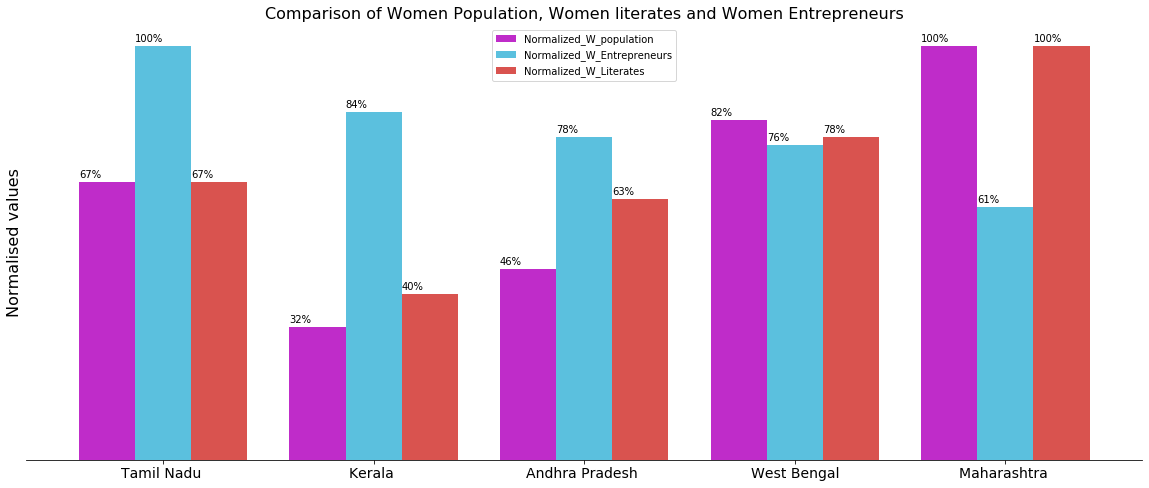

In [107]:
ax = df11 [['Normalized_W_population','Normalized_W_Entrepreneurs', 'Normalized_W_Literates']].plot(kind='bar',
              figsize=(20, 8), width = 0.8
, color=['#bf2cc9','#5bc0de','#d9534f'
], fontsize=14);
ax.set_alpha(0.8)
ax.set_title("Comparison of Women Population, Women literates and Women Entrepreneurs",
fontsize=16)
ax.set_ylabel("Normalised values", fontsize=16);
ax.set_yticks([])
ax.set_xticklabels(["Tamil Nadu ", "Kerala ", 
                    "Andhra Pradesh ", "West Bengal", 
                    "Maharashtra "], rotation=0, fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

##### From the bar chart it is observed that Tamil Nadu has the largest number of Women Entrepreneurs. However, it is with a lesser literacy rate as compared to Maharashtra which has a very high literacy rate. This is indicative of the fact that there could be different kind of successful businesses set up by women inspite of the lesser women literacy rate as compared to Maharashtra where literacy rate is high, but number of women entrepreneurs is less.

##### Multivariate Regression Analysis is also done to understand the influence of multiple parameters on women entrepreneurship

In [108]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
X = df11[["Normalized_W_population","Normalized_W_Literates"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df11["Normalized_W_Entrepreneurs"]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Female_Literates = 1
New_Female_Population = 1
print ('Normalized value of Predicted Women_Entrepreneurs: \n', regr.predict([[New_Female_Literates ,New_Female_Population]]))
p=regr.predict([[New_Female_Literates ,New_Female_Population]])
predict_WE_lit=p*we_max
print('Predicted value of women entrepreneurs ', (predict_WE_lit))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 1.195379976402363
Coefficients: 
 [ 0.65894291 -1.19012735]
Normalized value of Predicted Women_Entrepreneurs: 
 [0.66419553]
Predicted value of women entrepreneurs  [722385.03694365]
                                OLS Regression Results                                
Dep. Variable:     Normalized_W_Entrepreneurs   R-squared:                       0.497
Model:                                    OLS   Adj. R-squared:                 -0.006
Method:                         Least Squares   F-statistic:                    0.9889
Date:                        Sat, 13 Jul 2019   Prob (F-statistic):              0.503
Time:                                13:56:51   Log-Likelihood:                 4.9722
No. Observations:                           5   AIC:                            -3.944
Df Residuals:                               2   BIC:                            -5.116
Df Model:                                   2                                         
Covariance Type:    

/home/jupyterlab/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/jupyterlab/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


##### From the multivariate regression analysis, an attempt to predict of number of women entrepreneurs is made based on women literacy rate and this result is compared withat obtained from the bar graph

#####  In order to do this analysis, the predicted number is subtracted from the number available in the collated data. The name of the state which has this number closest to its existing data is then extracted. It is observed that the result predicted for a cohesive environment is Maharashtra which has the best women entrepreneurship numbers in comparison with its literacy rate and matches with the result from the bar graph.

In [109]:
df13 = pd.DataFrame(columns=['Subtracted','States'])
df13

df_new10
df13['States']= df_new10['States']
df13['Subtracted']=df10['Women_Entrepreneurship'] - predict_WE_lit
df13
df13['Subtracted'].min()
df_min=df13['Subtracted'].min()


In [110]:
df_answer=df13.loc[df13['Subtracted'].idxmin()]['States']
df_answer
print('The state with a cohesive environment related to women literacy and  women entrepreneurship is',df_answer)

The state with a cohesive environment related to women literacy and  women entrepreneurship is Maharashtra


#### We now analyse if the crimes in a state are influenced by literacy rates of both men and women. First a histogram of the relevant statistics are plotted and then a regression analysis is made to obtain a prediction of the number of crimes influenced by male and female literacy rates

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
df_crime = pd.read_csv("demographics_crime_no_tel.csv")
df_crime["Total_Area"] = pd.to_numeric(df5["Total_Area"])
columns=["States","Total_Area","Rural_Area","Urban_Area","total _population","Rural_population","Urban_population","Male_population","Female_Population","Women_Entrepreneurship","Female_Literates","Sex_Ratio","Density","Crime_Rate"]
df_crime.head()

,States,Total_Area,Rural_Area,Urban_Area,total _population,Rural_population,Urban_population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Male_literates,Sex_Ratio,Density,Crime_Rate
0,Andaman and Nicobar Island (UT),8211.08,37.92,8249.00,380581,143488,237093,126287,110806,2513,129476,146831,877,29,51
1,Andhra Pradesh,160205.00,4119.27,156085.73,49386799,14610410,34776389,24738068,24648731,849912,22678728,23444788,996,308,28246
2,Arunachal Pradesh,83743.00,0.00,0.00,1383727,1066358,317369,713912,669815,6413,335411,303281,938,17,171
3,Assam,78438.00,1259.88,77178.12,31205576,26807034,4398542,15939443,15266133,154158,8750080,8188697,960,347,11503
4,Bihar,94163.00,91838.28,2324.72,104099452,92341436,11758016,54278157,49821295,153610,21678279,20644376,918,1106,10231


In [112]:
df_crime_max=df_crime.sort_values(['Crime_Rate'], ascending=[False])
df_crime_max1=df_crime_max.head(5)
df_crime_max1


,States,Total_Area,Rural_Area,Urban_Area,total _population,Rural_population,Urban_population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Male_literates,Sex_Ratio,Density,Crime_Rate
32,West Bengal,53483.0,83632.59,5119.41,91276115,62183113,29093002,46809027,44467088,831337,28106397,27452426,953,1028,29133
1,Andhra Pradesh,160205.0,4119.27,156085.73,49386799,14610410,34776389,24738068,24648731,849912,22678728,23444788,996,308,28246
31,Uttar Pradesh,10486.0,233365.71,7562.29,199812341,155317278,44495063,104480510,95331831,482379,47944609,48901413,912,829,22639
27,Rajasthan,342239.0,335606.04,6632.96,68548437,51500352,17048085,35550997,32997440,247992,14785718,18047157,928,200,19888
18,Madhya Pradesh,308252.0,300505.59,7746.41,72626809,52557404,20069405,37612306,35014503,223405,17979056,19672274,931,236,16599


In [113]:
male_pop=df_crime['Male_literates'].max()
print('Max male literate population is ',male_pop)

Max male literate population is  48901413


In [114]:
max_crime=df_crime['Crime_Rate'].max()
print('Max crime occurence is ',max_crime)

Max crime occurence is  29133


In [115]:
we_max_crime=df_crime['Women_Entrepreneurship'].max()
print('Max women entrepreneurs are',we_max_crime)

Max women entrepreneurs are 1087609


In [116]:
fe_lit1=df_crime['Female_Literates'].max()
print('Max women literates are',fe_lit1)

Max women literates are 47944609


In [117]:
df_crime_norm=pd.DataFrame(df_crime_max1,columns=['States','Normalized_male_literates','Normalized_crime','Normalized_W_Literates'])
df_crime_norm['Normalized_male_literates']=round(df_crime_max1['Male_literates']/male_pop,2)
df_crime_norm['Normalized_crime']=round(df_crime_max1['Crime_Rate']/max_crime,2)
df_crime_norm['Normalized_W_Literates']=round(df_crime_max1['Female_Literates']/fe_lit1,2)
df_crime_norm.head(5)

,States,Normalized_male_literates,Normalized_crime,Normalized_W_Literates
32,West Bengal,0.56,1.00,0.59
1,Andhra Pradesh,0.48,0.97,0.47
31,Uttar Pradesh,1.00,0.78,1.00
27,Rajasthan,0.37,0.68,0.31
18,Madhya Pradesh,0.40,0.57,0.37


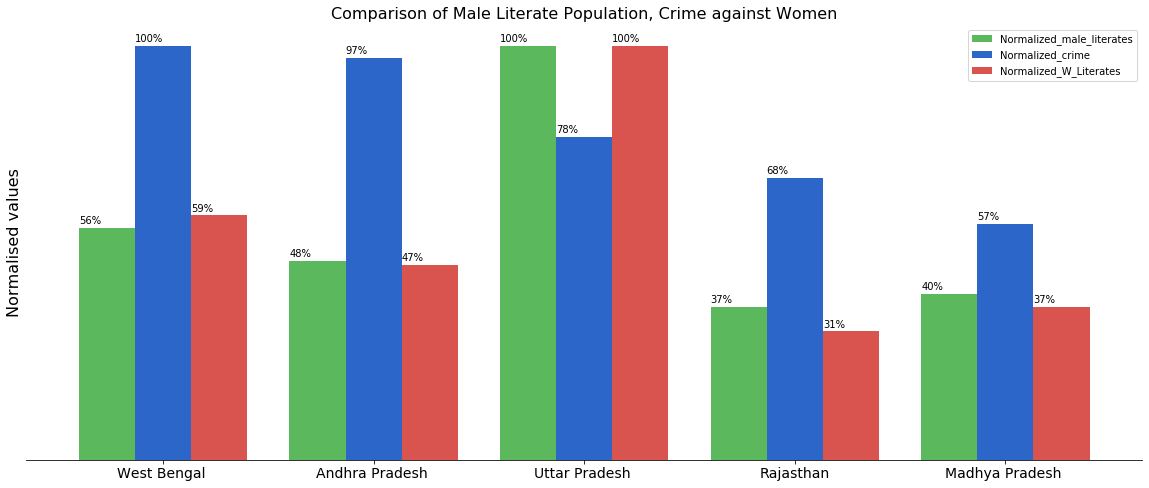

In [118]:
ax = df_crime_norm [['Normalized_male_literates','Normalized_crime','Normalized_W_Literates']].plot(kind='bar',
              figsize=(20, 8), width = 0.8
, color=['#5cb85c','#2c66c9','#d9534f'
], fontsize=14);
ax.set_alpha(0.8)
ax.set_title("Comparison of Male Literate Population, Crime against Women",
fontsize=16)
ax.set_ylabel("Normalised values", fontsize=16);
ax.set_yticks([])
ax.set_xticklabels(["West Bengal ", "Andhra Pradesh ", 
                    "Uttar Pradesh ", "Rajasthan", 
                    "Madhya Pradesh "], rotation=0, fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

##### Some observations that can be inferred from the histogram - West Bengal has the highest crime rate. However the influence of the other parameters can be better understood by multivariate regression analysis

In [119]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
X = df_crime_norm[["Normalized_W_Literates","Normalized_male_literates"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_crime_norm["Normalized_crime"]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
Normalized_W_Literates= 1
Normalized_male_literates = 1
print ('Normalized value of Crime: \n', regr.predict([[Normalized_W_Literates ,Normalized_male_literates]]))
p1=regr.predict([[Normalized_W_Literates ,Normalized_male_literates]])
pred_crime=(p1*max_crime)
print('Number of crimes predicted', (p1*max_crime))
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.958857610791281
Coefficients: 
 [ 4.69880564 -4.86441833]
Normalized value of Crime: 
 [0.79324492]
Number of crimes predicted [23109.60427701]


/home/jupyterlab/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/jupyterlab/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:       Normalized_crime   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1.426
Date:                Sat, 13 Jul 2019   Prob (F-statistic):              0.412
Time:                        13:56:52   Log-Likelihood:                 4.1214
No. Observations:                   5   AIC:                            -2.243
Df Residuals:                       2   BIC:                            -3.415
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [120]:
df_crime_new = pd.DataFrame(columns=['Subtracted','States'])
df_crime_new

df_max1_new=df_crime_max1
df_crime_new['States']= df_max1_new['States']
df_crime_new['Subtracted']=df_crime_max1['Crime_Rate'] - pred_crime
df_crime_new
df_crime_new['Subtracted'].min()
df_crime_new_min=df_crime_new['Subtracted'].min()
df_crime_new.head()

,Subtracted,States
32,6023.395723,West Bengal
1,5136.395723,Andhra Pradesh
31,-470.604277,Uttar Pradesh
27,-3221.604277,Rajasthan
18,-6510.604277,Madhya Pradesh


In [121]:
df_answer_crime=df_crime_new.loc[df_crime_new['Subtracted'].idxmin()]['States']
df_answer_crime
print('The state in which the crime rate considered to be minimum influenced by male literacy and female literacy rates is',df_answer_crime )

The state in which the crime rate considered to be minimum influenced by male literacy and female literacy rates is Madhya Pradesh


##### From the multivariate regression analysis , it can be seen that the crime rate is the lowest in Madhya Pradesh, influenced by the male and female literacy rates.

In [122]:
df_crime_max1.head()

,States,Total_Area,Rural_Area,Urban_Area,total _population,Rural_population,Urban_population,Male_population,Female_Population,Women_Entrepreneurship,Female_Literates,Male_literates,Sex_Ratio,Density,Crime_Rate
32,West Bengal,53483.0,83632.59,5119.41,91276115,62183113,29093002,46809027,44467088,831337,28106397,27452426,953,1028,29133
1,Andhra Pradesh,160205.0,4119.27,156085.73,49386799,14610410,34776389,24738068,24648731,849912,22678728,23444788,996,308,28246
31,Uttar Pradesh,10486.0,233365.71,7562.29,199812341,155317278,44495063,104480510,95331831,482379,47944609,48901413,912,829,22639
27,Rajasthan,342239.0,335606.04,6632.96,68548437,51500352,17048085,35550997,32997440,247992,14785718,18047157,928,200,19888
18,Madhya Pradesh,308252.0,300505.59,7746.41,72626809,52557404,20069405,37612306,35014503,223405,17979056,19672274,931,236,16599


##### DISCLAIMER: This project has been completed as a first time analysis of the different parameters influencing some demographics of an Indian state. However it may not be an exact analysis since only two parameters are considered during the regression analysis, while in reality there would many other parameters such as rural and urban population, population density which should be considered for an exact analysis. An attempt has been made to apply the different methodologies understood during the course to study the demographics. Also the analysis has been done under two different category heads with normalization done individually for the two dataframes.

### In this section of the project we study the eateries in and around Bangalore and identify the wards with maximum number on Inndian Restaurants. Data about the ward names and their co-ordinates are obtained from the relevant Wikipedia pages. BeautifulSoup  is used to scrape the webpages and data cleaning is then done

In [123]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_wards_in_Bangalore'

html_response = requests.get(url).text
soup = BeautifulSoup(html_response)
html_table = soup.find('table', {'class': 'wikitable'})

table_rows = html_table.findAll('tr')

Ward_numbers = []
Ward_names = []
Reservation_categorys = []
Lok_Sabha_constituencys=[]

for table_row in table_rows:
    cells = table_row.findAll('td')

    # Ignore rows that don't have td - The first row
    if len(cells) == 0:
        continue

    # Strip removes trailing \n character
    Ward_number = cells[0].text.strip()
    Ward_name = cells[1].text.strip()
    Reservation_category = cells[2].text.strip()
    Lok_Sabha_constituency= cells[3].text.strip()

   # Append into list
    Ward_numbers.append(Ward_number)
    Ward_names.append(Ward_name)
    Reservation_categorys.append(Reservation_category)
    Lok_Sabha_constituencys.append(Lok_Sabha_constituency)

# Create dataframe
df = pd.DataFrame({
    'Ward_number': Ward_numbers,
    'Ward_name': Ward_names,
    'Reservation_category': Reservation_categorys,
    'Lok_Sabha_constituency':Lok_Sabha_constituencys
})
df.head(10)

,Ward_number,Ward_name,Reservation_category,Lok_Sabha_constituency
0,1,Kempegowda,Backward Category B,Chikballapur
1,2,Chowdeshwari,Backward Category A (Women),Chikballapur
2,3,Attur,General (Women),Chikballapur
3,4,Yelahanka Satellite,Backward Category A,Chikballapur
4,5,Jakkur,General,Bangalore North
5,6,Thanisandra,Backward Category A (Women),Bangalore North
6,7,Byatarayanapura,Scheduled Tribe,Bangalore North
7,8,Kodigehalli,Backward Category B,Bangalore North
8,9,Vidyaranyapura,General (Women),Bangalore North
9,10,Doddabommasandra,General,Bangalore North


#### We retain only the columns needed for our project, namely Ward Number and the Ward Name, rest are dropped

In [124]:
df1=df.drop(['Reservation_category', 'Lok_Sabha_constituency'], axis=1)
df1.head()

,Ward_number,Ward_name
0,1,Kempegowda
1,2,Chowdeshwari
2,3,Attur
3,4,Yelahanka Satellite
4,5,Jakkur


#### We now obtain the co-ordinates of Bangalore

In [125]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

address = 'Bangalore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Bangalore  are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Bangalore  are 12.9791198, 77.5912997.


#### We now merge the dataframes with latitude, longitude and the ward names

In [126]:
geospatial_coords_file = 'blr_Coordinates.csv'
coords = pd.read_csv(geospatial_coords_file)
coords
# Rename column 'Postcal Code' with 'postcode'
# Renaming allows us to merge the two dataframes
coords.rename(columns={ 'Ward_No': 'Ward_number' }, inplace=True)
coords
# Merge dataframes
wards_with_coords=pd.merge(df1, coords, how='inner', right_on='Ward_name', left_on = 'Ward_name')
#wards_with_coords = pd.merge(df1, coords[['Latitude','Longitude']],how='right',on=['Ward_name'],suffixes=('_left', '_right'))

#wards_with_coords
wards_with_coords1=wards_with_coords.drop(['Ward_number_x'], axis=1)
wards_with_coords1.head()

,Ward_name,Ward_number_y,Latitude,Longitude
0,Kempegowda,1,13.109018,77.601900
1,Chowdeshwari,2,12.925190,77.588020
2,Attur,3,11.599586,78.596362
3,Yelahanka Satellite,4,13.095231,77.594296
4,Jakkur,5,13.078474,77.606894


#### After obtaining the co-ordinates of each ward, a map with Bangalore as the central location is plotted and the different wards are indicated with the help of blue markers

In [127]:

map_bng = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Ward_name in zip( wards_with_coords1['Latitude'],wards_with_coords1['Longitude'],wards_with_coords1['Ward_name']):
    label = '{}'.format( Ward_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bng)  
    
map_bng

In [128]:
CLIENT_ID = '51GCULZPIZUMT0KXZDXTOVLBMZGIOQTPPL1IHPDJFDPTTDS4' # your Foursquare ID
CLIENT_SECRET = 'N2CZRRICTNAWZ1UTT4EAA3UJPQD3QQNTCSOOISUCCREQ2GSF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 51GCULZPIZUMT0KXZDXTOVLBMZGIOQTPPL1IHPDJFDPTTDS4
CLIENT_SECRET:N2CZRRICTNAWZ1UTT4EAA3UJPQD3QQNTCSOOISUCCREQ2GSF


In [129]:
ward_latitude = wards_with_coords1.loc[0, 'Latitude'] # neighborhood latitude value
ward_longitude = wards_with_coords1.loc[0, 'Longitude'] # neighborhood longitude value

ward_name = wards_with_coords1.loc[0, 'Ward_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(ward_name, 
                                                               ward_latitude, 
                                                               ward_longitude))

Latitude and longitude values of Kempegowda are 13.10901775, 77.60190027.


In [130]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ward_latitude, 
    ward_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=51GCULZPIZUMT0KXZDXTOVLBMZGIOQTPPL1IHPDJFDPTTDS4&client_secret=N2CZRRICTNAWZ1UTT4EAA3UJPQD3QQNTCSOOISUCCREQ2GSF&v=20180605&ll=13.10901775,77.60190027&radius=500&limit=100'

#### We now get all data from Foursquare

In [131]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d29e32c0d2be7002cf35e11'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 13.113517754500004,
    'lng': 77.60651205427105},
   'sw': {'lat': 13.104517745499995, 'lng': 77.59728848572895}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f7421b3e4b02a1c5e0ea994',
       'name': 'Sri Raghavendra Food Line',
       'location': {'lat': 13.111305710201734,
        'lng': 77.6051875350942,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

In [132]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [133]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sri Raghavendra Food Line,Indian Restaurant,13.111306,77.605188


In [134]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,category_id=''):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       # print(name)
                    # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if(category_id!=''):
            url=url+'&CategoryId={}'
            url=url.format(category_id)
           
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [135]:
blr_venues = getNearbyVenues(names=wards_with_coords1['Ward_name'],
                                   latitudes=wards_with_coords1['Latitude'],
                                   longitudes=wards_with_coords1['Longitude'],
                                   category_id='4bf58dd8d48988d163941735'
                                  )

In [136]:
print(blr_venues.shape)
#blr_venues


(1461, 7)


In [137]:
bv = blr_venues[blr_venues['Venue Category'] == 'Indian Restaurant'].reset_index(drop=True)
bv.head(10)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kempegowda,13.109018,77.601900,Sri Raghavendra Food Line,13.111306,77.605188,Indian Restaurant
1,Chowdeshwari,12.925190,77.588020,1947,12.927642,77.586216,Indian Restaurant
2,Chowdeshwari,12.925190,77.588020,Meghana Foods,12.926237,77.584584,Indian Restaurant
3,Chowdeshwari,12.925190,77.588020,The Sofraah,12.923417,77.585262,Indian Restaurant
4,Chowdeshwari,12.925190,77.588020,Hot Chips,12.928670,77.585349,Indian Restaurant
5,Attur,11.599586,78.596362,Hotel Saravana Bhavan,11.599601,78.597274,Indian Restaurant
6,Byatarayanapura,13.062074,77.596392,Sanjay Dhaba,13.058612,77.593767,Indian Restaurant
7,Byatarayanapura,13.062074,77.596392,Swathi Gardenia,13.059108,77.593184,Indian Restaurant
8,Byatarayanapura,13.062074,77.596392,Bhagini Express,13.062840,77.592754,Indian Restaurant
9,Byatarayanapura,13.062074,77.596392,Hyderabadi Bawarchi,13.063128,77.591988,Indian Restaurant


In [138]:
bv_sorted = bv.groupby(['Neighborhood']).size().sort_values(ascending=False)
bv_sorted.head()
#bv_sorted.count().sort_values(ascending=False)

Neighborhood
Jayangar             9
Basavangudi          9
Maruthiseva Nagar    8
Hosathippasandra     8
Gandhi Nagar         8
dtype: int64

#### From the sorting and selections, we are able to obtain the Wards in Bangalore, here listed as Neighbourhood which have the maximum number of Indian Restaurants amongst the different eateries that exist. 

<span style="color:magenta"> ** Here the two wards / neighbourhoods recommeneded are Jayanagar and Basavangudi ** </span>